##Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Dataset




###Description of the Dataset:

This dataset contains a large number of segmented nuclei images. The images were acquired under a variety of conditions and vary in the cell type, magnification, and imaging modality (brightfield vs. fluorescence). The dataset is designed to challenge an algorithm's ability to generalize across these variations.

Each image is represented by an associated ImageId. Files belonging to an image are contained in a folder with this ImageId. Within this folder are two subfolders:

images contains the image file.
masks contains the segmented masks of each nucleus. This folder is only included in the training set. Each mask contains one nucleus. Masks are not allowed to overlap (no pixel belongs to two masks).

Source : [Data Science Bowl l2018](https://www.kaggle.com/c/data-science-bowl-2018/data)

####Extracting the Dataset Zip fie

*Total time needed to run two cells below this : 3 minutes, 38 seconds*

For Training folder -

In [ ]:
'''
import os
import zipfile

def extract_zip_file(zip_file_path):
    # Get the directory and file name of the zip file
    directory = os.path.dirname(zip_file_path)
    file_name = os.path.basename(zip_file_path)

    # Create a folder with the same name as the zip file
    folder_name = os.path.splitext(file_name)[0]
    folder_path = os.path.join(directory, folder_name)
    os.makedirs(folder_path, exist_ok=True)

    # Extract the zip file contents to the folder
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(folder_path)

zip_file_path = '/content/drive/MyDrive/Dataset_OSPI/stage1_train.zip'
extract_zip_file(zip_file_path)
'''

For testing Folder -

In [ ]:
'''
import os
import zipfile

def extract_zip_file(zip_file_path):
    # Get the directory and file name of the zip file
    directory = os.path.dirname(zip_file_path)
    file_name = os.path.basename(zip_file_path)

    # Create a folder with the same name as the zip file
    folder_name = os.path.splitext(file_name)[0]
    folder_path = os.path.join(directory, folder_name)
    os.makedirs(folder_path, exist_ok=True)

    # Extract the zip file contents to the folder
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(folder_path)

zip_file_path = '/content/drive/MyDrive/Dataset_OSPI/stage1_test.zip'
extract_zip_file(zip_file_path)
'''

##Data Cleaning

In [ ]:
#Importing Libraries
import tensorflow as tf
import os
import numpy as np
import sys
import random
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
from PIL import Image

In [ ]:
IMG_WIDTH =  128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/Dataset_OSPI/stage1_train'
TEST_PATH = '/content/drive/MyDrive/Dataset_OSPI/stage1_test'

#Read the Image IDs
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [ ]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

In [ ]:
print('Resizing Training Images & masks')

for n,id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
  path = TRAIN_PATH + '/' + id_
  img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
  #print(img.shape)
  img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
  #img = rgb2gray(img)
  #print(img.shape)

  X_train[n] = img #fill empty X_train with values from img

  mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

  for mask_file in next(os.walk(path + '/masks/'))[2]:
    mask_ = imread(path + '/masks/' + mask_file)
    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
    mask = np.maximum(mask, mask_)


  Y_train[n] = mask

##Using Try-except block

In [ ]:
print('Resizing Training Images & masks')

for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + '/' + id_
    try:
        img = imread(path + '/images/' + id_ + '.png')[:, :, :IMG_CHANNELS]
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        X_train[n] = img

        mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

        for mask_file in next(os.walk(path + '/masks/'))[2]:
            mask_ = imread(path + '/masks/' + mask_file)
            mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
            mask = np.maximum(mask, mask_)

        Y_train[n] = mask
    except FileNotFoundError:
        print(f"Image not found for id: {id_}")
        pass

Resizing Training Images & masks


 82%|████████▏ | 548/670 [04:47<00:44,  2.77it/s]

Image not found for id: d1b173875e2261f55014bd27bd7174b9ae1c769338c1b31b5d737e9e60175993


 82%|████████▏ | 552/670 [04:47<00:24,  4.77it/s]

Image not found for id: d1ba6089cae2f90cb7275ece10ca393c25f60ea17e5c9c3cea2399d31fd41869
Image not found for id: d1dbc6ee7c44a7027e935d040e496793186b884a1028d0e26284a206c6f5aff0


 83%|████████▎ | 554/670 [04:48<00:21,  5.37it/s]

Image not found for id: d256b32adda37f2301c9e46f34b7f9a36cce273256369ceb5dc2c73c3007e3c4
Image not found for id: d2815f2f616d92be35c7e8dcfe592deec88516aef9ffc9b21257f52b7d6d0354


 83%|████████▎ | 556/670 [04:48<00:21,  5.34it/s]

Image not found for id: d2ce593bddf9998ce3b76328c0151d0ba4b644c293aca7f6254e521c448b305f
Image not found for id: d32ea6d318626ca14a967d0c1ad3218aebfe636624a8d1173f5150dde8ff38cf


 83%|████████▎ | 558/670 [04:48<00:19,  5.80it/s]

Image not found for id: d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28
Image not found for id: d3ce382f190ee24729bd2e80684c11bef72bc9c733cdbbc19a17d2c1b2e775f7


 84%|████████▎ | 560/670 [04:49<00:18,  6.00it/s]

Image not found for id: d4d6c683f249d82518431603bf0206d05f2114ac871a99ffade0f5f61cf167e1
Image not found for id: d4d88391bc399a3715440d4da9f8b7a973e010dc1edd9551df2e5a538685add5


 84%|████████▍ | 562/670 [04:49<00:20,  5.34it/s]

Image not found for id: d52958107d0b1f0288f50f346a833df3df485b92d5516cfcb536e73ab7adafd0
Image not found for id: d6a880b1f6056f3086679de5c810e7af87cdf3bbbd0533a83e3681817fce40fc


 84%|████████▍ | 564/670 [04:49<00:19,  5.38it/s]

Image not found for id: d751ccb64fa767a65a966061218438bd1860695d96bbef11fdb2f0d3b8dedba8
Image not found for id: d7d12a2acc47a94961aeb56fd56e8a0873016af75f5dd10915de9db8af8e4f5e


 84%|████████▍ | 566/670 [04:50<00:18,  5.64it/s]

Image not found for id: d7db360fabfce9828559a21f6bffff589ae868e0dc6101d7c1212de34a25e3cb
Image not found for id: d7ec8003735996458b56ccb8ae34d080eb2a6adabef931323239632515b4b220


 85%|████████▍ | 568/670 [04:50<00:16,  6.10it/s]

Image not found for id: d7fc0d0a7339211f2433829c6553b762e2b9ef82cfe218d58ecae6643fa8e9c7
Image not found for id: d827a7d80fc67487a3237135e0d43ae01b7bbcb135e1a167601fc974a8348c51
Image not found for id: d8607b21411c9c8ab532faaeba15f8818a92025897950f94ee4da4f74f53660a
Image not found for id: d910b2b1be8406caecfe31a503d412ffc4e3d488286242ebc7381836121dd4ef
Image not found for id: da31f2aa8601afec5c45180a2c448cb9c4a8ec7b35e75190d6ba3588f69058c8
Image not found for id: da5f98f2b8a64eee735a398de48ed42cd31bf17a6063db46a9e0783ac13cd844
Image not found for id: da79a2b105f055ce75404a04bf53bbb51d518d9381af7b4ac714c137f101d920
Image not found for id: da8ca06ccbb4e2a8718f7c2939ef6cc3a4088981f660842ad885a8273e740d55
Image not found for id: dabfee30b46d23569c63fa7253ef10b2407fbe8023035a5030252313cb718097
Image not found for id: dad607a203483439fcbc2acecd0a39fb5e5a94a32a94348f5c802c79cfeb6e7c
Image not found for id: dae976f161fe42dc58dee87d4bf2eb9f65736597cab0114138641b2a39a5c42b
Image not found for i

100%|██████████| 670/670 [04:50<00:00,  2.31it/s]

Image not found for id: f6cb37ebf29c225284c8415962f7287abe7007fae8fe3d8a3899b608b832d7d5
Image not found for id: f728de04267283f0b4daab9a840e7433b2c6034baf195fd526850439c9297687
Image not found for id: f73e37957c74f554be132986f38b6f1d75339f636dfe2b681a0cf3f88d2733af
Image not found for id: f7e5dcfc9c93183c668c5a4ab028d5faad54fb54298711f2caae0508aa978300
Image not found for id: f7eaaf420b5204c4a42577428b7cd897a53ef07b759ccbba3ed30a3548ca5605
Image not found for id: f81ca7ee25e733ff37240c34c8e3044d9937bb0166e315952ebde3f237ecb86f
Image not found for id: f8e74d4006dd68c1dbe68df7be905835e00d8ba4916f3b18884509a15fdc0b55
Image not found for id: f93ec5e683d81005ffc2a84a1c0299b2406ad14b764b824e013f7ca3a13833b5
Image not found for id: f952cc65376009cfad8249e53b9b2c0daaa3553e897096337d143c625c2df886
Image not found for id: f9ac03b0344ce8c48bc058448541f9211a1e5f4c94fdaf633dd534328d8610ab
Image not found for id: f9ea1a1159c33f39bbe5f18bb278d961188b40508277eab7c0b4b91219b37b5d
Image not found for i

In [ ]:
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

sizes_test = []

print('Resizing test images')
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
  path = TEST_PATH + '/' + id_
  img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
  sizes_test.append([img.shape[0], img.shape[1]])
  img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
  X_test[n] = img

Resizing test images


100%|██████████| 65/65 [00:34<00:00,  1.91it/s]


In [ ]:
print("Done!")

Done!


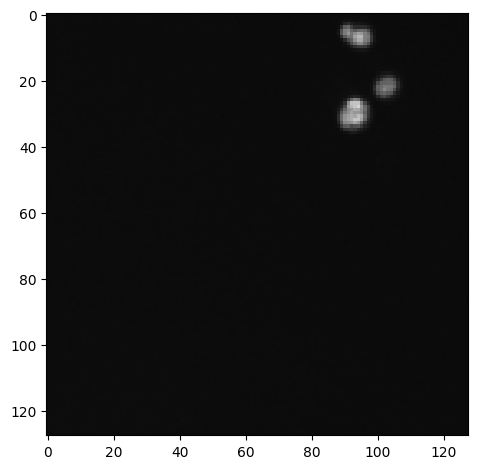

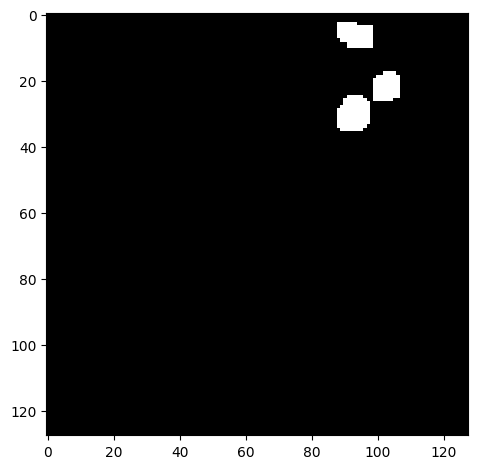

In [ ]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

##U-Net: For Biomedical Image Segmentation

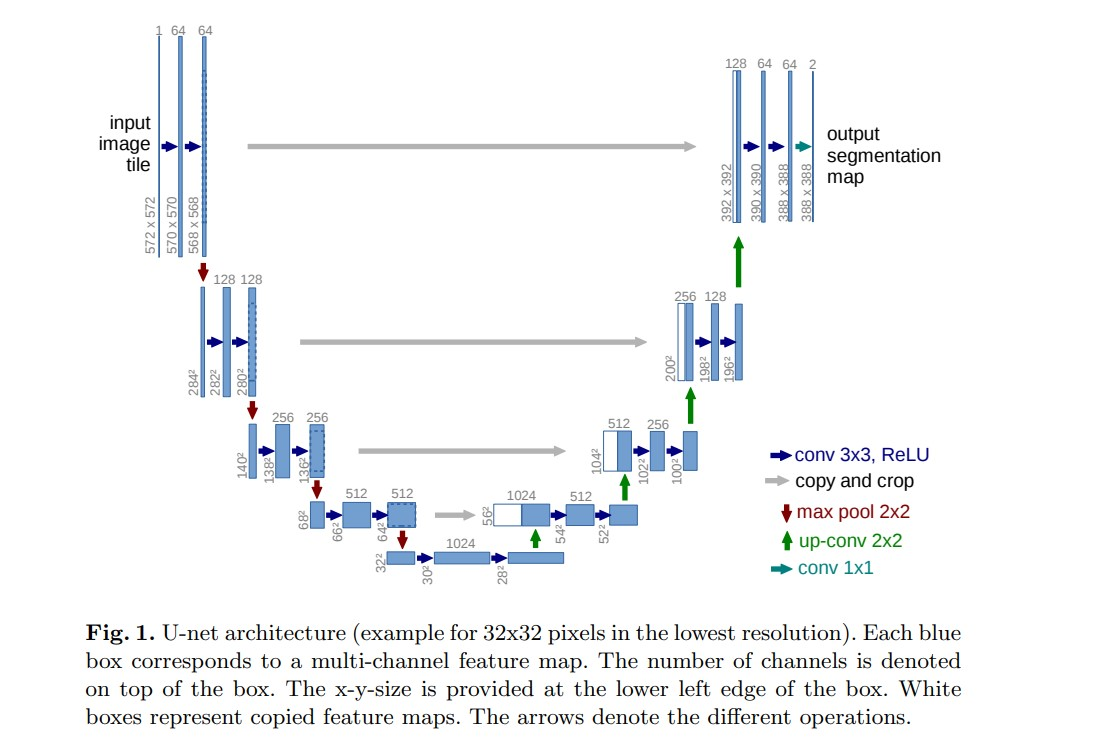

Down sampling & Up sampling shown in the above diagram.


It is an architecture primarily used for Image semantic segmentation, meaning painting the objects in the image as a certain label.



###Split dataset into train, test and validation

Note: No parameters during Dropout

In [ ]:
from PIL import Image
import os


#from keras.backend import categorical_crossentropy
#Building the model

inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

#Convert each pixel to a floating point number
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                              

In [ ]:
#checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_skinnd.h5', verbose=1, save_best_only=True)

In [ ]:
#callbacks = [
#    tf.keras.callbacks.EarlyStopping(patience=2, monitor='accuracy'),
#    tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/datasets_Lesion')
#]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=10)

Fitting the model

In [ ]:
results = model.fit(x_train,y_train,batch_size=19,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
29/29 [==============================] - 24s 147ms/step - loss: 0.5518 - accuracy: 0.7925 - val_loss: 0.4546 - val_accuracy: 0.7815
Epoch 2/30
29/29 [==============================] - 2s 59ms/step - loss: 0.3140 - accuracy: 0.8362 - val_loss: 0.2717 - val_accuracy: 0.8774
Epoch 3/30
29/29 [==============================] - 2s 55ms/step - loss: 0.2016 - accuracy: 0.9172 - val_loss: 0.1848 - val_accuracy: 0.9281
Epoch 4/30
29/29 [==============================] - 2s 56ms/step - loss: 0.1433 - accuracy: 0.9435 - val_loss: 0.1602 - val_accuracy: 0.9389
Epoch 5/30
29/29 [==============================] - 2s 53ms/step - loss: 0.1195 - accuracy: 0.9536 - val_loss: 0.1456 - val_accuracy: 0.9447
Epoch 6/30
29/29 [==============================] - 2s 55ms/step - loss: 0.1089 - accuracy: 0.9572 - val_loss: 0.1314 - val_accuracy: 0.9476
Epoch 7/30
29/29 [==============================] - 2s 56ms/step - loss: 0.1108 - accuracy: 0.9572 - val_loss: 0.1345 - val_accuracy: 0.9489
Epoch 8/30


In [ ]:
results.history

{'loss': [0.551779568195343,
  0.3140011727809906,
  0.20164506137371063,
  0.1433146595954895,
  0.1194508820772171,
  0.10892880707979202,
  0.11079573631286621,
  0.10985968261957169,
  0.1033540591597557,
  0.091510109603405,
  0.09195811301469803,
  0.08782792091369629,
  0.08809054642915726,
  0.08731313049793243,
  0.08382914960384369,
  0.08279484510421753,
  0.07946284115314484,
  0.07846754044294357,
  0.0811191275715828,
  0.07932273298501968,
  0.0828007161617279,
  0.07783421874046326,
  0.0793217271566391,
  0.0755232721567154,
  0.08038169890642166,
  0.07749003171920776,
  0.0746704488992691,
  0.07638807594776154,
  0.07270127534866333,
  0.07072214037179947],
 'accuracy': [0.7924891114234924,
  0.8361668586730957,
  0.9172333478927612,
  0.9435257315635681,
  0.9536315202713013,
  0.9571546912193298,
  0.9571834802627563,
  0.9579575061798096,
  0.9604560732841492,
  0.9644215106964111,
  0.9638711810112,
  0.9656046628952026,
  0.9656550884246826,
  0.966036081314086

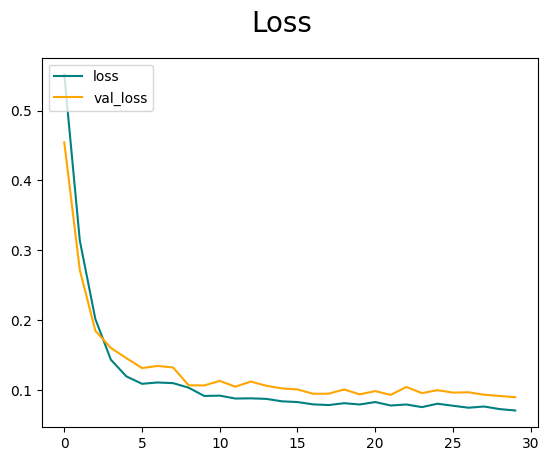

In [ ]:
#plot performance
fig=plt.figure()
plt.plot(results.history['loss'],color='teal',label='loss')
plt.plot(results.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [31]:
model.save("/content/drive/MyDrive/Dataset_OSPI/final/nuclei.keras")

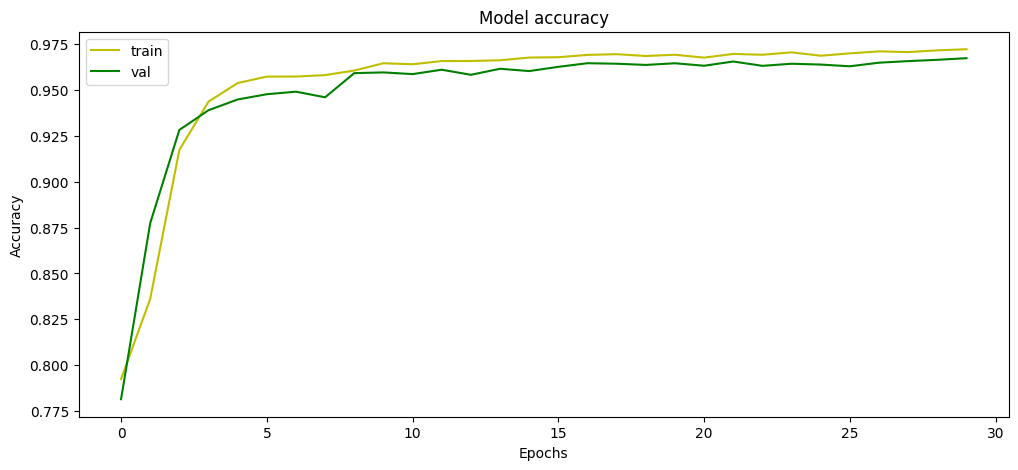

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(results.history['accuracy'],color='y')
plt.plot(results.history['val_accuracy'],color='g')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [ ]:
print("Calculating model accuracy")
scores=model.evaluate(x_val,y_val)
print(f"Test Accuracy :{scores[1]*100}")

Calculating model accuracy
5/5 [==============================] - 2s 139ms/step - loss: 0.0897 - accuracy: 0.9672
Test Accuracy :96.717768907547


##Making predictions

In [ ]:
idx = random.randint(0, len(X_train))

preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)



3/3 [==============================] - 0s 13ms/step


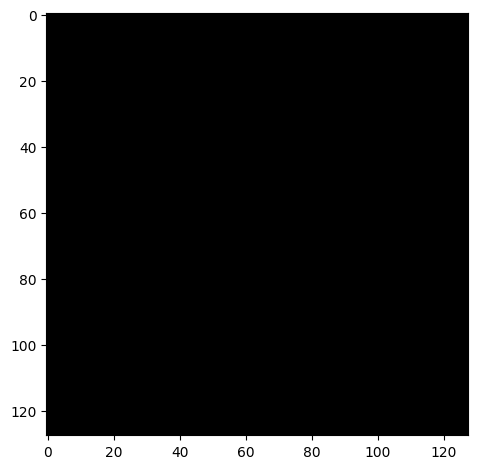

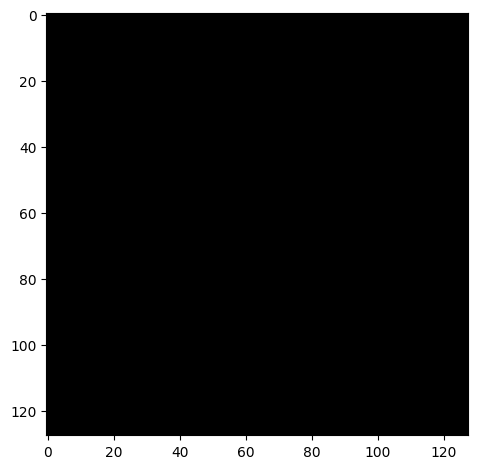

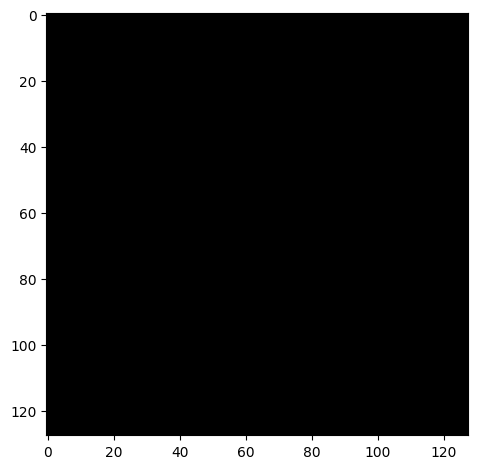

In [ ]:
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()

In [34]:
'''
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
path=input("Enter image url : ")
img=cv2.imread(path)
plt.imshow(img)
plt.show()
'''

'\nimport cv2\nimport matplotlib.pyplot as plt\nimport tensorflow as tf\npath=input("Enter image url : ")\nimg=cv2.imread(path)\nplt.imshow(img)\nplt.show()\n'

In [ ]:
import numpy as np
np.expand_dims(img,0)

array([[[[26.49994078, 26.49994078, 26.49994078],
         [17.25908789, 17.25908789, 17.25908789],
         [15.36742028, 15.36742028, 15.36742028],
         ...,
         [10.9563853 , 10.9563853 , 10.9563853 ],
         [11.09001246, 11.09001246, 11.09001246],
         [10.54837933, 10.54837933, 10.54837933]],

        [[22.53849693, 22.53849693, 22.53849693],
         [16.92953592, 16.92953592, 16.92953592],
         [15.9072047 , 15.9072047 , 15.9072047 ],
         ...,
         [11.63099474, 11.63099474, 11.63099474],
         [11.56882471, 11.56882471, 11.56882471],
         [11.55441116, 11.55441116, 11.55441116]],

        [[17.29406341, 17.29406341, 17.29406341],
         [15.58624118, 15.58624118, 15.58624118],
         [14.4286669 , 14.4286669 , 14.4286669 ],
         ...,
         [11.71481549, 11.71481549, 11.71481549],
         [11.72896348, 11.72896348, 11.72896348],
         [11.1167667 , 11.1167667 , 11.1167667 ]],

        ...,

        [[30.93984941, 30.93984941, 30

In [ ]:
final = model.predict(np.expand_dims(img/255,0))

1/1 [==============================] - 0s 254ms/step


In [ ]:
final.tolist()

[[[[0.05701069161295891],
   [0.009869887493550777],
   [0.003867935389280319],
   [0.0022375667467713356],
   [0.0012732319300994277],
   [0.0011091447668150067],
   [0.0010639542015269399],
   [0.0010676871752366424],
   [0.0009925559861585498],
   [0.0010513033485040069],
   [0.0011115611996501684],
   [0.0011324002407491207],
   [0.0010922737419605255],
   [0.001141406362876296],
   [0.0011603373568505049],
   [0.0011397043708711863],
   [0.0010552624007686973],
   [0.0011070484761148691],
   [0.0011631271336227655],
   [0.0012053800746798515],
   [0.0011770065175369382],
   [0.0012276360066607594],
   [0.0012729967711493373],
   [0.001285783015191555],
   [0.001236411975696683],
   [0.0013131608720868826],
   [0.001380938570946455],
   [0.0014357372419908643],
   [0.0013944554375484586],
   [0.0014436059864237905],
   [0.0014232451794669032],
   [0.0013594493502750993],
   [0.0011819235514849424],
   [0.0011699153110384941],
   [0.0011239434825256467],
   [0.0010953909950330853],


In [33]:
'''
lst=final[0]

max1 = max(lst)
def ind(lst):
  for i in range(4):
    if(max1==lst[i]):
      return i
k=ind(lst)
all_labels=['dermoscopy']
print("The patient condition is ",all_labels[k])
'''

'\nlst=final[0]\n\nmax1 = max(lst)\ndef ind(lst):\n  for i in range(4):\n    if(max1==lst[i]):\n      return i\nk=ind(lst)\nall_labels=[\'dermoscopy\']\nprint("The patient condition is ",all_labels[k])\n'

In [ ]:
import os
import zipfile

def zip_folder(folder_path):
    # Get the parent directory and folder name
    parent_dir, folder_name = os.path.split(folder_path)

    # Create a zip file in the same directory as the folder
    zip_path = os.path.join(parent_dir, f"{folder_name}.zip")
    with zipfile.ZipFile(zip_path, "w") as zip_file:
        # Iterate over all files and subdirectories in the folder
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                # Get the full path of the file
                file_path = os.path.join(root, file)

                # Add the file to the zip file with its relative path
                zip_file.write(file_path, os.path.relpath(file_path, folder_path))

    print(f"Folder '{folder_name}' zipped successfully as '{zip_path}'")

# Example usage
folder_path = "/content/drive/MyDrive/Dataset_OSPI"
zip_folder(folder_path)

Folder 'Dataset_OSPI' zipped successfully as '/content/drive/MyDrive/Dataset_OSPI.zip'


In [32]:
os.listdir("/content/drive/MyDrive/Dataset_OSPI/stage1_train")

['00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552',
 '003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1',
 '00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e',
 '0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed',
 '01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf',
 '0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21',
 '0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426',
 '02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339',
 '03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776',
 '03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe',
 '03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a',
 '0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd',
 '04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e',
 '05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13',
 '0532c64c2fd0c4d3188cc751cdfd566b